
Simulation for Primary Power = 15 dB

Secondary User Positions and Received Powers:
User ID | Position (x, y)
------------------------------
      1 | ( 37.45,  95.07) |
      2 | ( 73.20,  59.87) |
      3 | ( 15.60,  15.60) |
      4 | (  5.81,  86.62) |
      5 | ( 60.11,  70.81) |
      6 | (  2.06,  96.99) |
      7 | ( 83.24,  21.23) |
      8 | ( 18.18,  18.34) |
      9 | ( 30.42,  52.48) |
     10 | ( 43.19,  29.12) |
     11 | ( 61.19,  13.95) |
     12 | ( 29.21,  36.64) |
     13 | ( 45.61,  78.52) |
     14 | ( 19.97,  51.42) |
     15 | ( 59.24,   4.65) |
     16 | ( 60.75,  17.05) |
     17 | (  6.51,  94.89) |
     18 | ( 96.56,  80.84) |
     19 | ( 30.46,   9.77) |
     20 | ( 68.42,  44.02) |


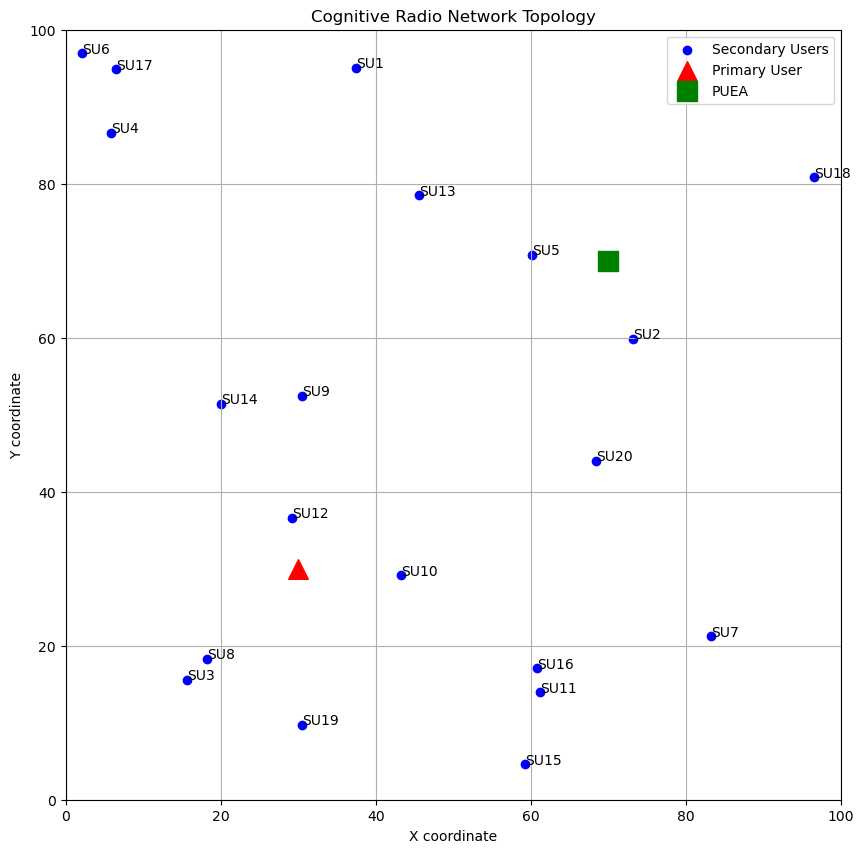


Iteration 1:
Array of received powers from Primary User:
 [-21.87062024 -33.72984925  -3.78997138 -49.76188281 -25.11832451
 -41.44694527 -29.03054051 -14.07189742 -26.07102711  -1.70387104
 -38.13685314 -12.30040277 -51.17016293 -28.91318059 -28.67263606
 -36.26332068 -17.32028633 -30.25763612  -8.72020464 -26.56251294]
Array of received powers from PUEA:
 [-22.32505439 -17.98005196 -20.73200753 -55.99145252 -12.27997097
 -46.55041643 -33.28262984 -38.656185   -39.87240932 -20.15908937
 -51.36606977 -49.1397897  -44.72583898 -47.30397028 -41.12964912
 -49.22093155 -22.20829892 -24.12788981 -25.24841525 -26.36185046]

Iteration 2:
Array of received powers from Primary User:
 [-43.73791282 -18.24197872 -42.24471336 -37.00614197 -34.10558805
 -25.58650806 -36.41047411 -23.38244737 -10.7210581  -53.09432095
 -46.4015225  -35.13425485 -27.4400606  -28.69125357   2.02682555
 -28.25209504 -28.31187394 -46.77958485 -34.37182756 -24.91703572]
Array of received powers from PUEA:
 [-57.16667146

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def calculate_received_power(tx_power, distance, path_loss_exp, shadowing):
    path_loss = 10 * path_loss_exp * np.log10(distance)
    received_power = tx_power - path_loss + shadowing
    return received_power

def run_simulation(primary_power, num_iterations):
    # Network parameters
    num_secondary_users = 20
    area_size = 100
    puea_power = 10 
    shadowing_std_dev = 10  # Range 0-10

    # Initialize separate result matrices for PU and PUEA
    pu_result_matrix = []
    puea_result_matrix = []

    for iteration in range(num_iterations):
        # Set random seed for reproducibility but different for each iteration
        np.random.seed(42 + iteration)

        # Generate random positions
        secondary_positions = np.random.uniform(0, area_size, size=(num_secondary_users, 2))
        primary_position = np.array([30, 30])
        puea_position = np.array([70, 70])

        # Initialize arrays
        distances_to_primary = np.zeros(num_secondary_users)
        distances_to_puea = np.zeros(num_secondary_users)
        path_loss_exponents = np.random.uniform(2, 4, num_secondary_users)  # Range 2-4
        shadowing_values = np.random.uniform(0, 10, num_secondary_users)  # Range 0-10
        received_powers_primary = np.zeros(num_secondary_users)
        received_powers_puea = np.zeros(num_secondary_users)

        # Calculate features
        for i in range(num_secondary_users):
            distances_to_primary[i] = calculate_distance(secondary_positions[i], primary_position)
            distances_to_puea[i] = calculate_distance(secondary_positions[i], puea_position)

            received_powers_primary[i] = calculate_received_power(
                primary_power,
                distances_to_primary[i],
                path_loss_exponents[i],
                shadowing_values[i]
            )

            received_powers_puea[i] = calculate_received_power(
                puea_power,
                distances_to_puea[i],
                path_loss_exponents[i],
                shadowing_values[i]
            )

        # Print table for first iteration
        if iteration == 0:
            print("\nSecondary User Positions and Received Powers:")
            print("User ID | Position (x, y)")
            print("-" * 30)
            for i in range(num_secondary_users):
                print(f"{i+1:7d} | ({secondary_positions[i,0]:6.2f}, {secondary_positions[i,1]:6.2f}) |")

            # Plot network topology
            plt.figure(figsize=(10, 10))
            plt.scatter(secondary_positions[:, 0], secondary_positions[:, 1],
                       label='Secondary Users', c='blue', marker='o')
            plt.scatter(primary_position[0], primary_position[1],
                       label='Primary User', c='red', marker='^', s=200)
            plt.scatter(puea_position[0], puea_position[1],
                       label='PUEA', c='green', marker='s', s=200)

            for i in range(num_secondary_users):
                plt.annotate(f'SU{i+1}', (secondary_positions[i, 0], secondary_positions[i, 1]))

            plt.title('Cognitive Radio Network Topology')
            plt.xlabel('X coordinate')
            plt.ylabel('Y coordinate')
            plt.grid(True)
            plt.legend()
            plt.axis([0, area_size, 0, area_size])
            plt.show()

        # Print power arrays
        print(f"\nIteration {iteration + 1}:")
        print("Array of received powers from Primary User:\n", received_powers_primary)
        print("Array of received powers from PUEA:\n", received_powers_puea)

        # Append to respective result matrices
        pu_result_matrix.append(received_powers_primary)
        puea_result_matrix.append(received_powers_puea)
    print("HEello")
    print(len(pu_result_matrix))
    print(pu_result_matrix)
    return pu_result_matrix, puea_result_matrix

# Example usage
primary_powers = [15]  # Different values of primary power
final_pu_matrices = []
final_puea_matrices = []

for pr in primary_powers:
    print(f"\nSimulation for Primary Power = {pr} dB")
    pu_result, puea_result = run_simulation(pr, num_iterations=50)  #iteration
    final_pu_matrices=pu_result
    final_puea_matrices=puea_result
    print("\nPrimary User Result Matrix:")
    print(pu_result)
    print("\nPUEA Result Matrix:")
    print(puea_result)


In [34]:
import numpy as np

def calculate_statistics(data_array):
    """
    Calculate statistical measures for a given array
    Returns list of [mean, median, variance, upper_quartile, lower_quartile]
    """
    mean = round(np.mean(data_array), 2)
    median = round(np.median(data_array), 2)
    variance = round(np.var(data_array), 2)
    upper_quartile = round(np.percentile(data_array, 75), 2)
    lower_quartile = round(np.percentile(data_array, 25), 2)
    return [mean, median, variance, upper_quartile, lower_quartile]

def process_matrices(pu_matrix, puea_matrix):
    """
    Process two matrices (PU and PUEA) and replace each array with its statistics
    Returns two processed matrices
    """
    # Create copies to avoid modifying original matrices
    processed_pu = []
    processed_puea = []

    # Process PU matrix
    for array in pu_matrix:
        statistics = calculate_statistics(array)
        processed_pu.append(statistics)

    # Process PUEA matrix
    for array in puea_matrix:
        statistics = calculate_statistics(array)
        processed_puea.append(statistics)

    return processed_pu, processed_puea

print("PU Matrix:", final_pu_matrices)
print("PUEA Matrix:", final_puea_matrices)

# Example usage:
# pu_matrix and puea_matrix should be lists of arrays or numpy arrays

processed_pu_matrix, processed_puea_matrix = process_matrices(final_pu_matrices, final_puea_matrices)
print("Processed PU Matrix:", processed_pu_matrix)
print("Processed PUEA Matrix:", processed_puea_matrix)


# Combine the processed matrices into a single matrix
combined_matrix = np.vstack((processed_pu_matrix, processed_puea_matrix))
print("Combined Matrix:")
print(combined_matrix)

PU Matrix: [array([-21.87062024, -33.72984925,  -3.78997138, -49.76188281,
       -25.11832451, -41.44694527, -29.03054051, -14.07189742,
       -26.07102711,  -1.70387104, -38.13685314, -12.30040277,
       -51.17016293, -28.91318059, -28.67263606, -36.26332068,
       -17.32028633, -30.25763612,  -8.72020464, -26.56251294]), array([-43.73791282, -18.24197872, -42.24471336, -37.00614197,
       -34.10558805, -25.58650806, -36.41047411, -23.38244737,
       -10.7210581 , -53.09432095, -46.4015225 , -35.13425485,
       -27.4400606 , -28.69125357,   2.02682555, -28.25209504,
       -28.31187394, -46.77958485, -34.37182756, -24.91703572]), array([-41.99824316, -16.21494632, -38.09827248, -19.29113242,
       -45.04159528, -39.67514354, -28.28564143, -46.18935387,
       -48.924854  , -18.84314411, -22.25606295, -31.23000232,
       -19.33215413, -22.64628887, -37.87983557, -13.86050077,
       -26.09698863, -23.59699027, -14.30225648, -17.41066427]), array([-44.96451394, -18.28122637, -3

In [35]:
data = combined_matrix

# Calculate Manhattan Distance matrix
def calculate_manhattan_distance_matrix(samples):
    n_samples = len(samples)
    distance_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            distance_matrix[i][j] = np.sum(np.abs(samples[i] - samples[j]))

    return distance_matrix

# Calculate and display part of the distance matrix
distance_matrix = calculate_manhattan_distance_matrix(combined_matrix)
print("\nShape of distance matrix:", distance_matrix.shape)
print("\nSample of distance matrix (first 5x5):")
print(distance_matrix[:10, :10])


Shape of distance matrix: (100, 100)

Sample of distance matrix (first 5x5):
[[  0.    41.97  64.05  38.66  58.1  114.53  37.06  70.32  56.58  63.4 ]
 [ 41.97   0.    47.28  73.79  59.21 109.96  78.45 104.97  43.21 102.57]
 [ 64.05  47.28   0.    90.33  41.09  63.36  94.99 129.05  10.31 119.11]
 [ 38.66  73.79  90.33   0.    88.14 144.87  12.04  41.5   88.4   30.28]
 [ 58.1   59.21  41.09  88.14   0.    75.05  76.98 127.08  39.16  99.82]
 [114.53 109.96  63.36 144.87  75.05   0.   134.81 183.81  73.67 164.43]
 [ 37.06  78.45  94.99  12.04  76.98 134.81   0.    50.98  93.06  31.54]
 [ 70.32 104.97 129.05  41.5  127.08 183.81  50.98   0.   121.04  27.58]
 [ 56.58  43.21  10.31  88.4   39.16  73.67  93.06 121.04   0.   117.18]
 [ 63.4  102.57 119.11  30.28  99.82 164.43  31.54  27.58 117.18   0.  ]]


KMeans Label
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0]
DBSCAN Label
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Agglomerative Label
[0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


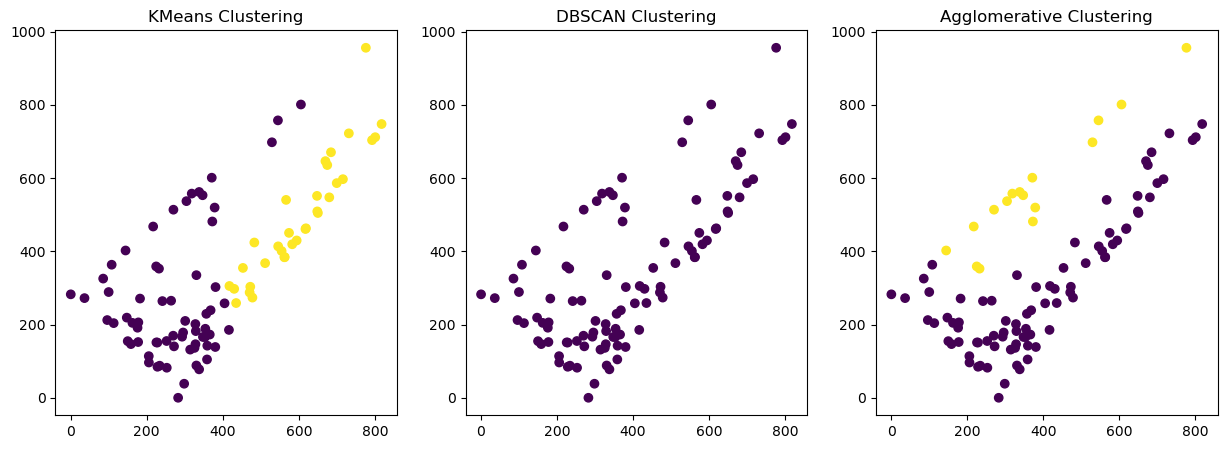

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# Function to perform clustering and plot results
def perform_clustering(distance_matrix):
    # Convert distance matrix to a format suitable for clustering algorithms
    X = pairwise_distances(distance_matrix)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=2)
    kmeans_labels = kmeans.fit_predict(X)
    print("KMeans Label")
    print(kmeans_labels)

    # DBSCAN Clustering
    dbscan = DBSCAN(metric='precomputed')
    dbscan_labels = dbscan.fit_predict(distance_matrix)
    print("DBSCAN Label")
    print(dbscan_labels)

    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=2, metric='precomputed', linkage='average')
    agglomerative_labels = agglomerative.fit_predict(distance_matrix)
    print("Agglomerative Label")
    print(agglomerative_labels)
    

    # Plotting the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # KMeans Plot
    axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels)
    axs[0].set_title('KMeans Clustering')

    # DBSCAN Plot
    axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels)
    axs[1].set_title('DBSCAN Clustering')

    # Agglomerative Plot
    axs[2].scatter(X[:, 0], X[:, 1], c=agglomerative_labels)
    axs[2].set_title('Agglomerative Clustering')
    

    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate random data
    perform_clustering(distance_matrix)

In [37]:
def calculate_detection_metrics(detected_malicious_count: int,
                              actual_malicious_count: int,
                              misclassified_legitimate_count: int,
                              total_legitimate_count: int) -> dict:
    """
    Calculate Detection Rate (DR) and False Detection Rate (FDR) for a security detection system.
    
    Parameters:
    -----------
    detected_malicious_count : int
        Number of colluding attackers detected by the system
    actual_malicious_count : int
        Actual count of malicious SUs present in the system
    misclassified_legitimate_count : int
        Number of legitimate non-malicious SUs incorrectly detected as colluding attackers
    total_legitimate_count : int
        Total count of non-malicious SUs in the system
    
    Returns:
    --------
    dict
        Dictionary containing DR and FDR values
        
    Raises:
    -------
    ValueError
        If any input values are negative or if denominators are zero
    """
    # Input validation
    if any(count < 0 for count in [detected_malicious_count, actual_malicious_count,
                                  misclassified_legitimate_count, total_legitimate_count]):
        raise ValueError("All input counts must be non-negative")
        
    if actual_malicious_count == 0:
        raise ValueError("Actual malicious count cannot be zero for DR calculation")
        
    if total_legitimate_count == 0:
        raise ValueError("Total legitimate count cannot be zero for FDR calculation")
    
    # Calculate Detection Rate (DR)
    dr = detected_malicious_count / actual_malicious_count
    
    # Calculate False Detection Rate (FDR)
    fdr = misclassified_legitimate_count / total_legitimate_count
    
    return {
        "detection_rate": dr,
        "false_detection_rate": fdr
    }

# Example usage:
if __name__ == "__main__":
    try:
        # Example scenario
        metrics = calculate_detection_metrics(
            detected_malicious_count=85,     # System detected 85 malicious SUs
            actual_malicious_count=100,      # There were actually 100 malicious SUs
            misclassified_legitimate_count=15,# 15 legitimate SUs were wrongly flagged
            total_legitimate_count=500       # Total of 500 legitimate SUs in system
        )
        
        print(f"Detection Rate (DR): {metrics['detection_rate']:.2%}")
        print(f"False Detection Rate (FDR): {metrics['false_detection_rate']:.2%}")
        
    except ValueError as e:
        print(f"Error: {e}")

Detection Rate (DR): 85.00%
False Detection Rate (FDR): 3.00%
